In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('books.csv',on_bad_lines='skip')


In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
top_ten = df[df['ratings_count'] > 1000000].sort_values(by='average_rating', ascending=False).head(10)


C:\Users\Evim Preschool\AppData\Local\Temp\ipykernel_7960\2813898546.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


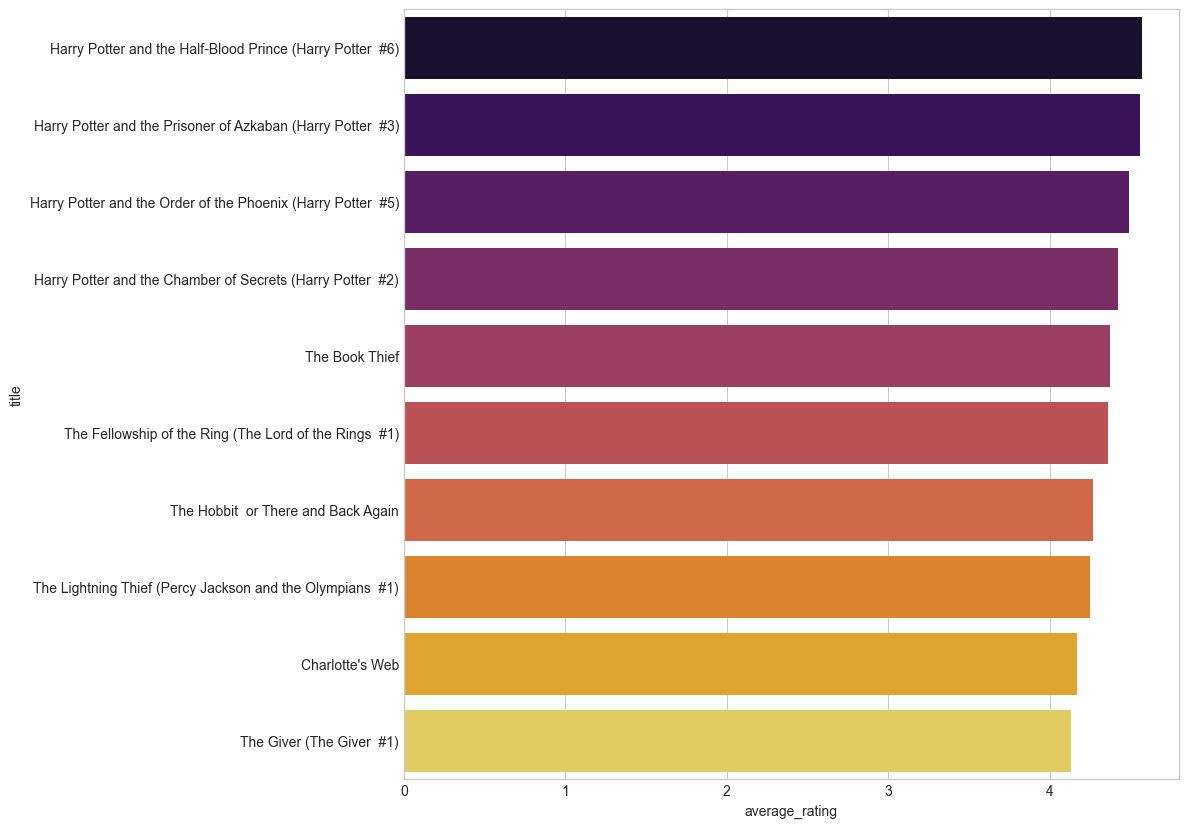

In [5]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
sns.barplot(x="average_rating", y="title", data=top_ten, palette='inferno')
plt.show()

In [6]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')


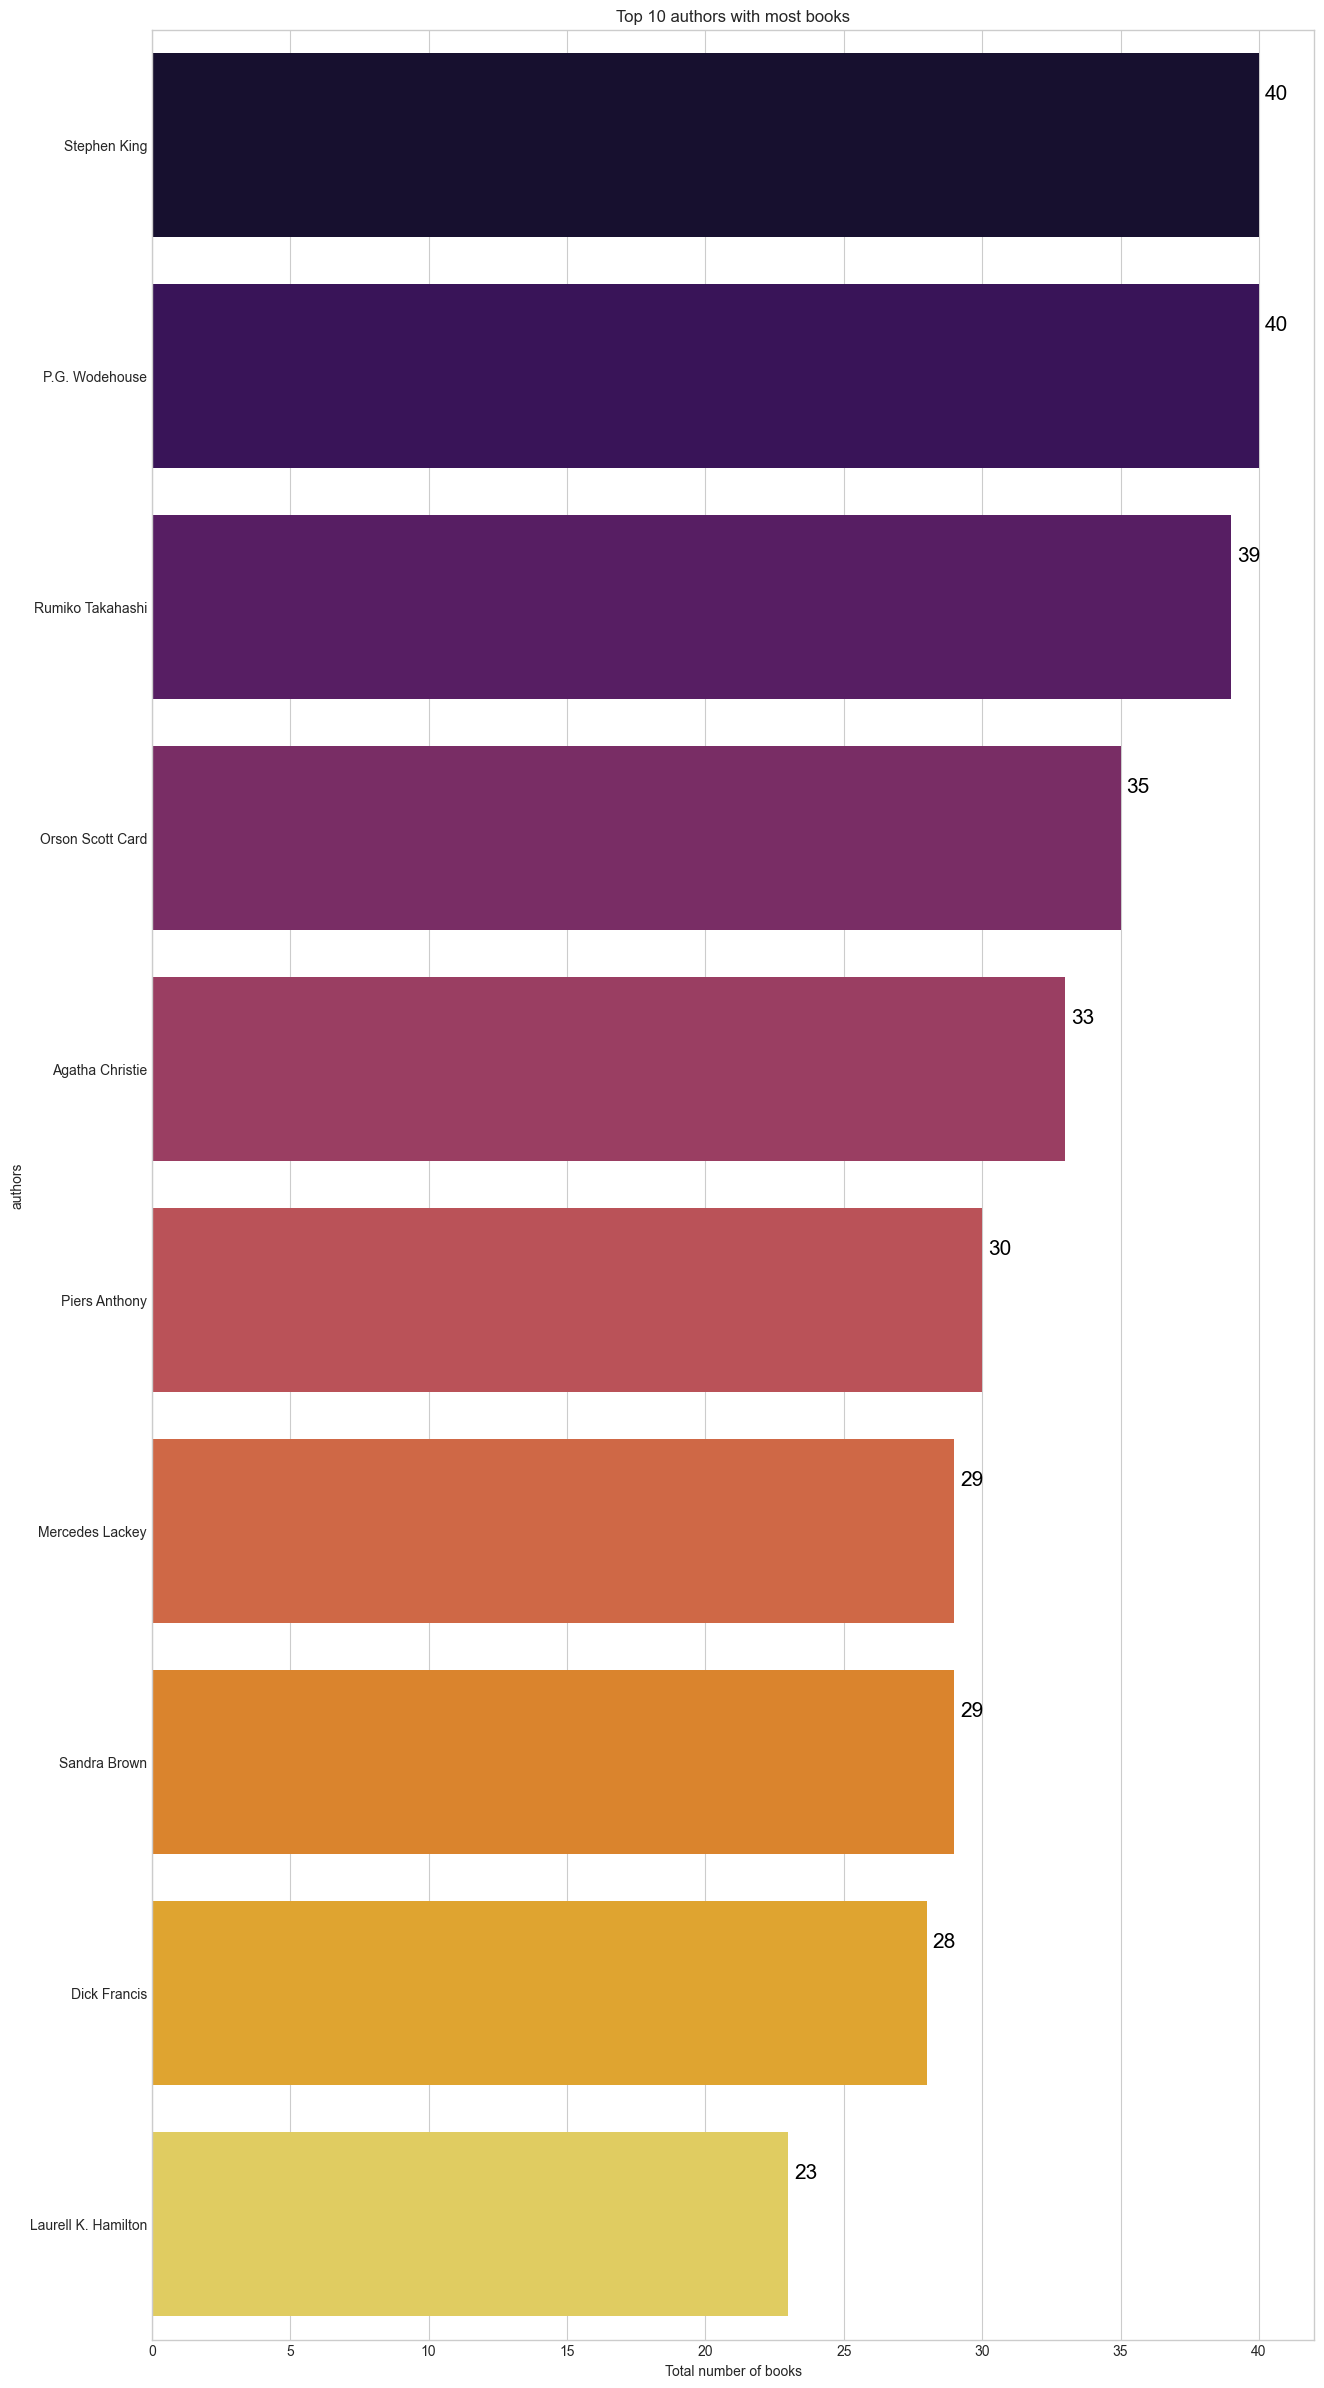

In [7]:
plt.figure(figsize=(15, 30))
ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

# Add text annotations
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())), fontsize=15, color='black')

plt.show()

In [8]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')


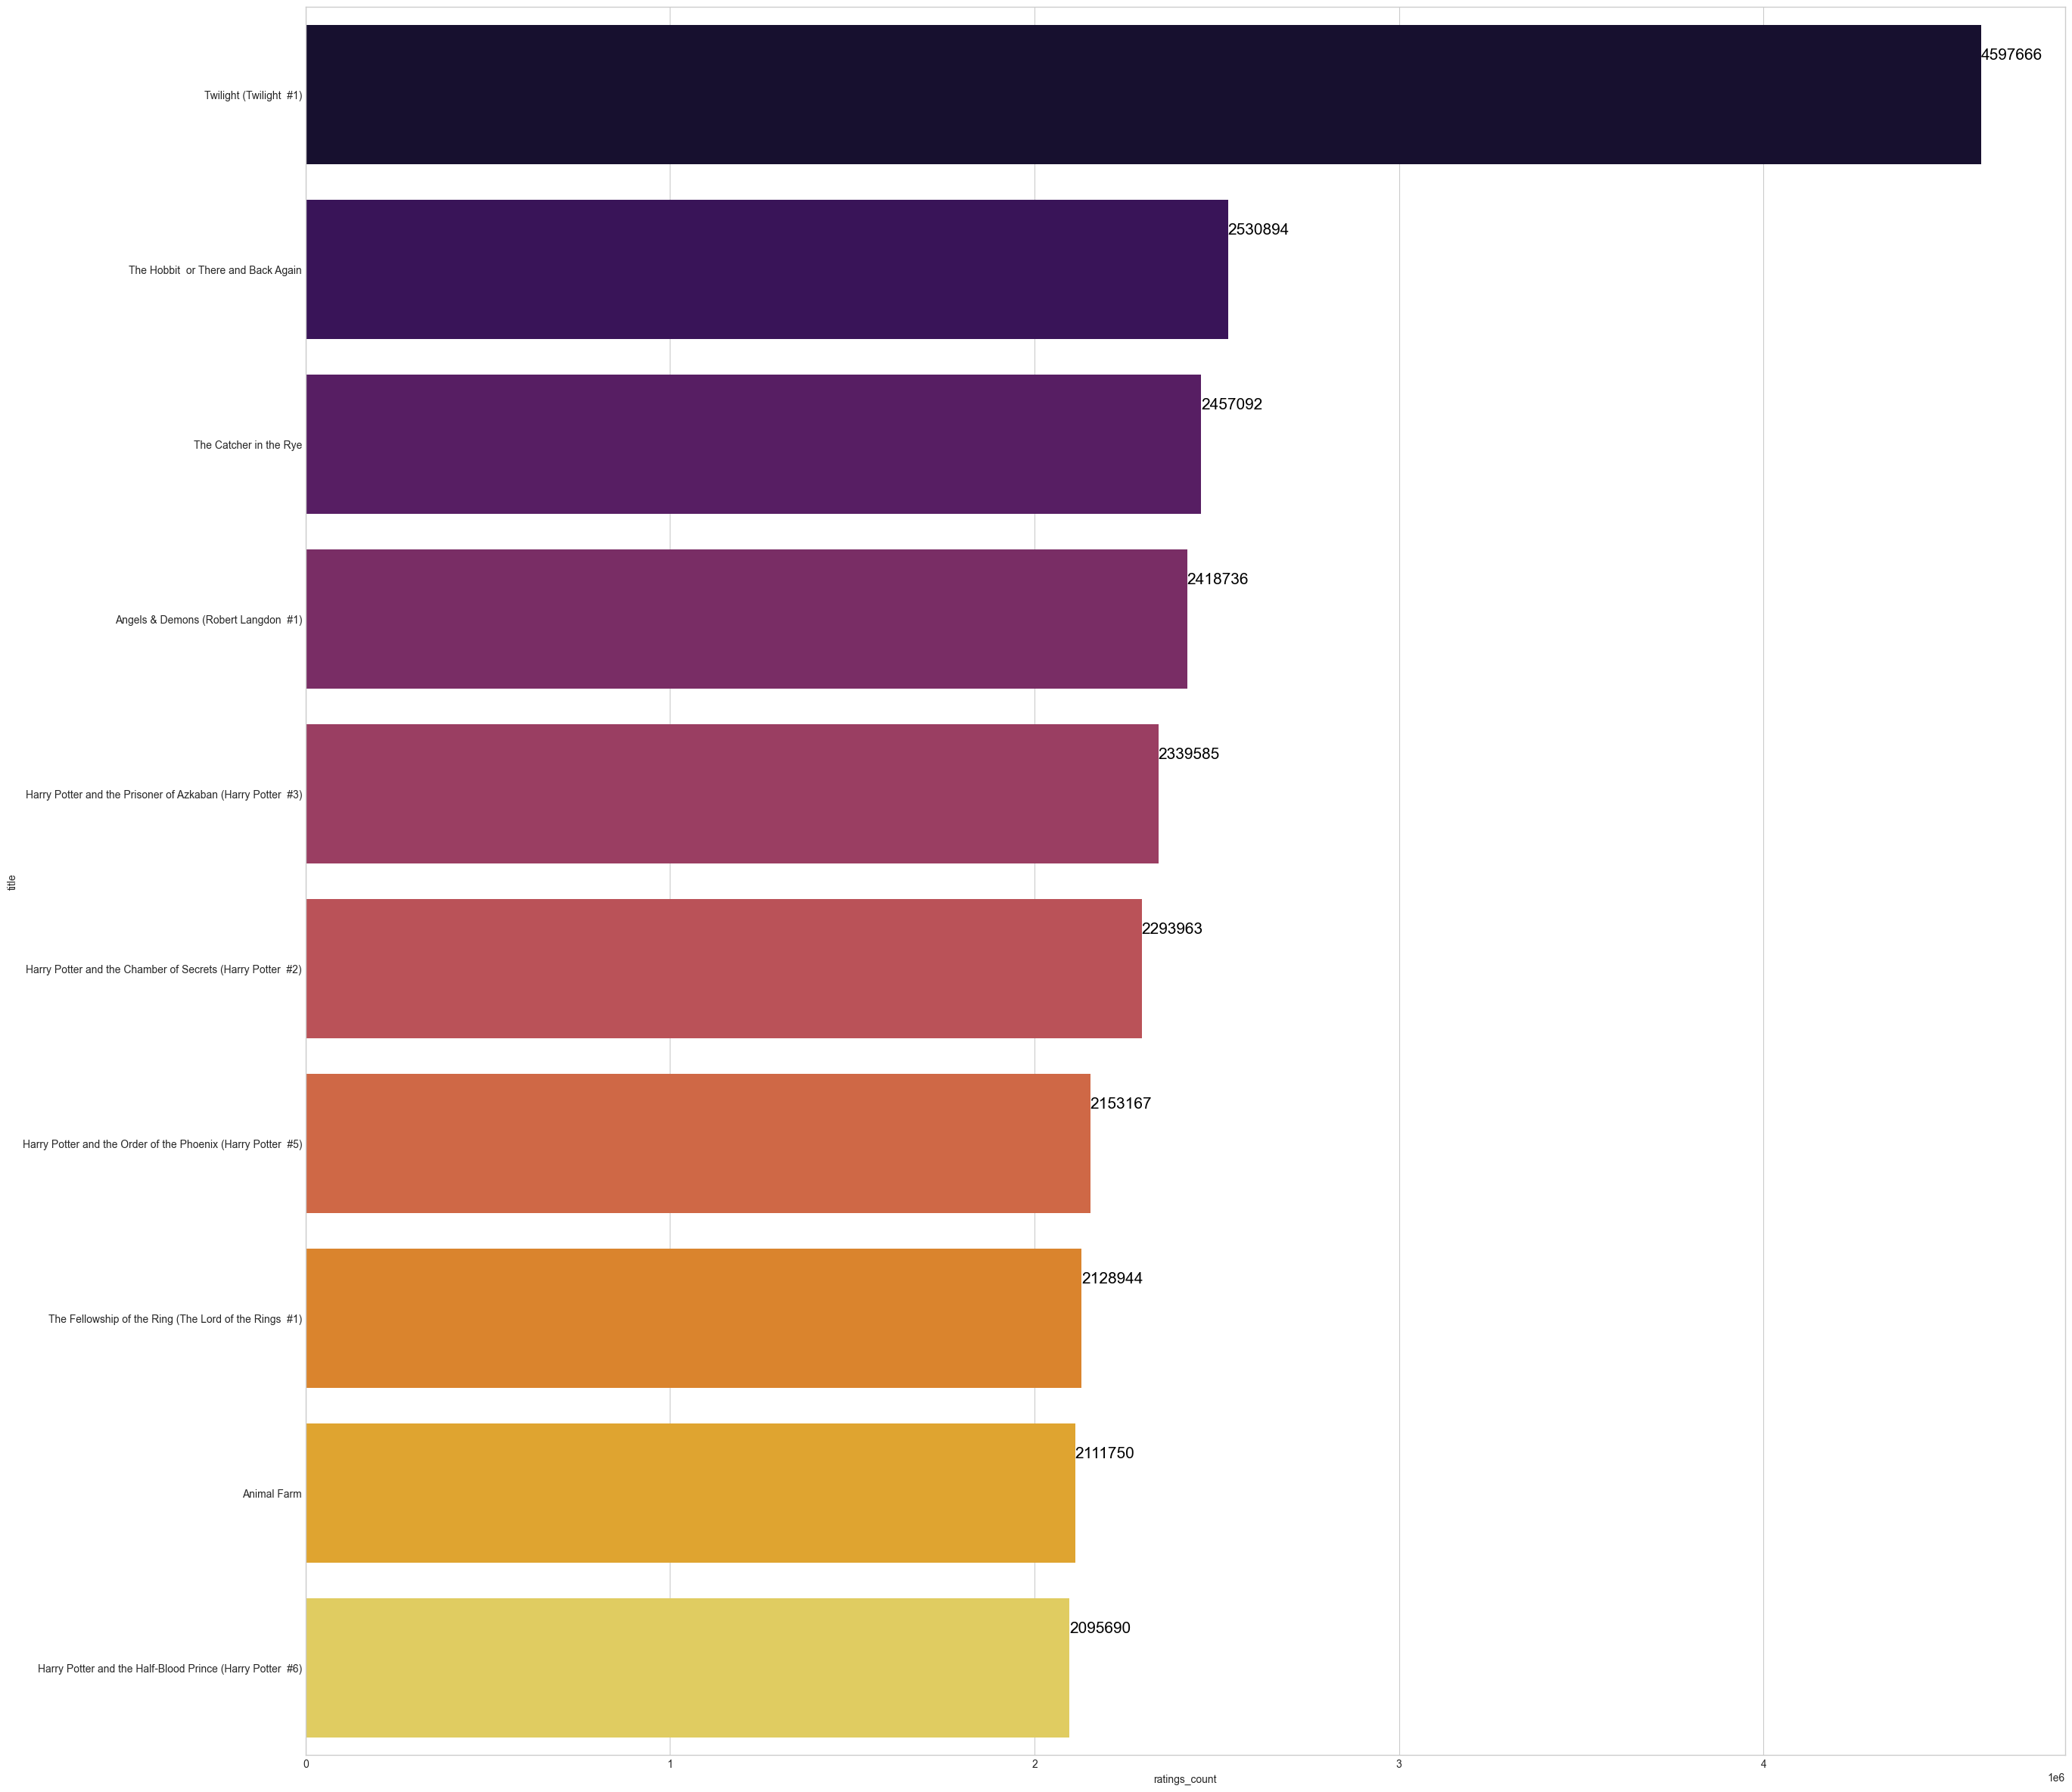

In [9]:
plt.figure(figsize=(30,30))
ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='inferno')

# Add text annotations
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())), fontsize=15, color='black')

plt.show()

C:\Users\Evim Preschool\AppData\Local\Temp\ipykernel_7960\2988746623.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'],ax=ax)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Average rating')

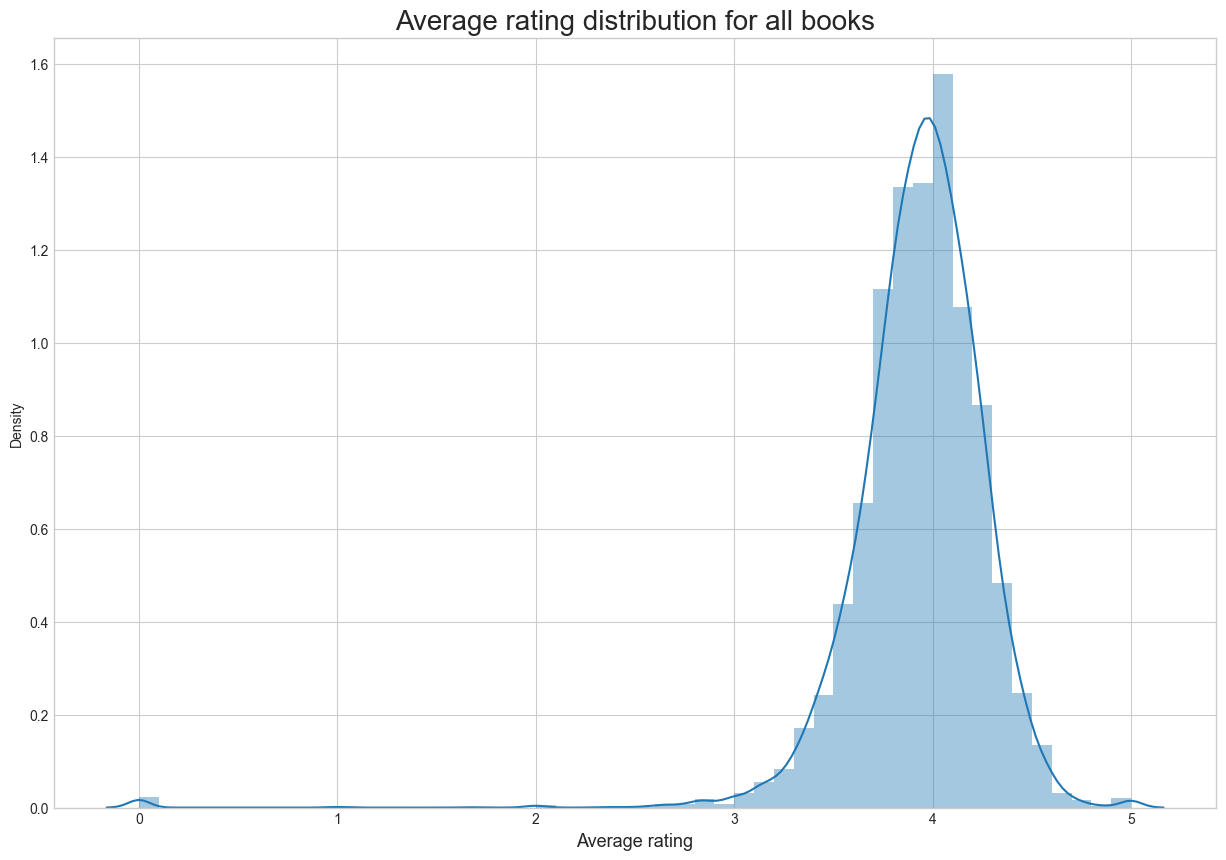

In [10]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

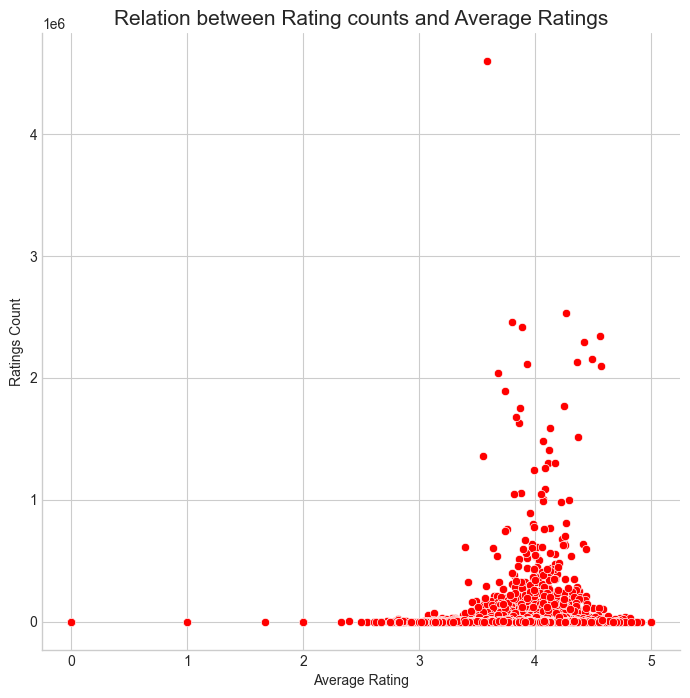

In [11]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1500x1000 with 0 Axes>

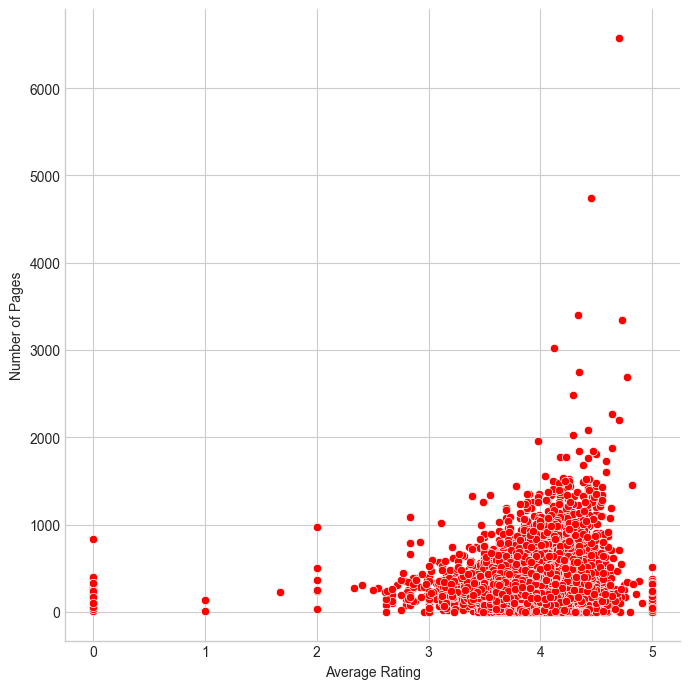

In [12]:

plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [13]:
df2=df

In [14]:

# Define bins and labels
bins = [0, 1, 2, 3, 4, 5]
labels = ["between 0 and 1", "between 1 and 2", "between 2 and 3", "between 3 and 4", "between 4 and 5"]

# Create 'rating_between' column
df2['rating_between'] = pd.cut(df2['average_rating'], bins=bins, labels=labels, right=True, include_lowest=True)


In [15]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [16]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [18]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')


In [19]:
model.fit(features)


NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [20]:
dist, idlist = model.kneighbors(features)


In [21]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

In [22]:
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')


In [23]:
BookNames


['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']

In [24]:
#save the model
import pickle
pickle.dump(model, open('book recomandation.h5', 'wb'))